# Elastic Properties and Deformation Energy

* This tutorial discuss the analyses that can be performed using the [dnaMD Python module](http://do-x3dna.readthedocs.io/en/latest/api_summary.html) included in the _do\_x3dna_ package. The tutorial is prepared using [Jupyter Notebook](https://jupyter.org/) and this notebook tutorial file could be downloaded from this [link](http://rjdkmr.github.io/do_x3dna/tut_notebook/calculate_elasticity_tutorial.ipynb).


* Download the input files that are used in the tutorial from this [link](http://rjdkmr.github.io/do_x3dna/tutorial_data.tar.gz).


* Two following input files are required in this tutorial

    * ``tutorial_data/elasticity_DNA/free_dna.h5`` 
    * ``tutorial_data/elasticity_DNA/bound_dna.h5``
    
These two files **should be** present inside tutorial_data/elasticity_DNA of the present working directory.
    
    
* The above two files can be created by the steps as shown [here](http://do-x3dna.readthedocs.io/en/latest/global_elasticity_example.html#Calculate-stretching-twisting-and-bending-motions)


### Importing Python Modules

* [numpy](http://www.numpy.org/): Required for the calculations involving large arrays


* [matplotlib](http://matplotlib.org/): Required to plot the results


* [dnaMD](http://do-x3dna.readthedocs.io/en/latest/api_summary.html): Python module to analyze DNA/RNA structures from the do_x3dna output files.

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import dnaMD

%matplotlib inline

### Initializing eyDNA object with free_dna.h5 file

* [eyDNA object](https://do-x3dna.readthedocs.io/en/latest/dnaEY_api.html) is initialized by using the total number of base-pairs and HDF5 file.

* This class contains all the required functions to calculate the elastic properties and deformation free energy.

In [2]:
eyDNA = dnaMD.dnaEY(27, 'BST', filename='elasticity_DNA/free_dna.h5')

### Determining modulus matrix - bending, stretching and twisting

Modulus matrix for all three major motions (bending, stretching and twisting) can be obtained with getStrecthTwistBend method.

In the following example, matrix is calculated for all frames and first 5000 frames, respectively.


In [3]:
# All frames
avg, mod_matrix = eyDNA.getStretchTwistBendModulus([4,20], paxis='X')
print('Average values for all frames: ', avg)
print('Modulus matrix for all frames: \n', mod_matrix )
print(' ')

# Elastic matrix
avg, mod_matrix = eyDNA.getStretchTwistBendModulus([4,20], paxis='X', matrix=True)
print('Average values for all frames: ', avg)
print('Elastic constant matrix for all frames: \n', mod_matrix )
print(' ')

Average values for all frames:  [0.02137576 0.06756513 5.35794425 9.5425644 ]
Modulus matrix for all frames: 
 [[ 337.23299773   28.50565693   -6.98412669  -20.71008355]
 [  28.50565693  373.86276276    7.97658176   39.50860135]
 [  -6.98412669    7.97658176 1080.72200976  -96.19760022]
 [ -20.71008355   39.50860135  -96.19760022  448.34908519]]
 
Average values for all frames:  [0.02137576 0.06756513 5.35794425 9.5425644 ]
Elastic constant matrix for all frames: 
 [[15.19593397  1.28448308 -0.3147092  -0.93320957]
 [ 1.28448308 16.84649455  0.35942986  1.78028278]
 [-0.3147092   0.35942986 48.69802306 -4.33472522]
 [-0.93320957  1.78028278 -4.33472522 20.20289574]]
 


The elastic matrix is in this form:

$$\text{Elastic matrix} = \begin{bmatrix}
    K_{Bx}       & K_{Bx,By} & K_{Bx,S} & K_{Bx,T} \\
    K_{Bx,By}    & K_{By}    & K_{By,S} & K_{By,T} \\
    K_{Bx,S}     & K_{By,S}  & K_{S}    & K_{S,T} \\
    K_{Bx,T}     & K_{Bx,T}  & K_{S,T}  & K_{T}
\end{bmatrix}
$$

Where:

* $Bx$ - Bending motion in one plane
* $By$ - Bending motion in another orthogonal plane
* $S$ - Stretching motion
* $T$ - Twisting motion


$$\text{modulus matrix} =
\begin{bmatrix}
M_{Bx}       & M_{Bx,By} & M_{Bx,S} & M_{Bx,T} \\
M_{Bx,By}    & M_{By}    & M_{By,S} & M_{By,T} \\
M_{Bx,S}     & M_{By,S}  & M_{S}    & M_{S,T} \\
M_{Bx,T}     & M_{Bx,T}  & M_{S,T}  & M_{T}
\end{bmatrix}
$$

$$
= 4.1419464 \times \begin{bmatrix}
K_{Bx}       & K_{Bx,By} & K_{Bx,S} & K_{Bx,T} \\
K_{Bx,By}    & K_{By}    & K_{By,S} & K_{By,T} \\
K_{Bx,S}     & K_{By,S}  & K_{S}    & K_{S,T} \\
K_{Bx,T}     & K_{Bx,T}  & K_{S,T}  & K_{T}
\end{bmatrix} \times L_0
$$

Where:

* $M_{Bx}$ - Bending-1 stiffness in one plane
* $M_{By}$ - Bending-2 stiffness in another orthogonal plane
* $M_{S}$ - Stretch Modulus
* $M_{T}$ - Twist rigidity
* $M_{Bx,By}$ - Bending-1 and Bending-2 coupling
* $M_{By,S}$ - Bending-2 and stretching coupling
* $M_{S,T}$ - Stretching Twsiting coupling
* $M_{Bx,S}$ - Bending-1 Stretching coupling
* $M_{By,T}$ - Bending-2 Twisting coupling
* $M_{Bx,T}$ - Bending-1 Twisting coupling


### Convergence in bending, stretching and twisting with their couplings

Elasticities cannot be calcualted from an individual snapshot or frame. However, these properties can be calculated as a function of time by considering all the frames up to that time. For example, 0-50 ns, 0-100 ns, 0-150 ns etc. By this method, we can analyze the convergence and also further we can calculate error using block average method.

Elasticities over the time can be calculated using getElasticityByTime method.

If **esType=``'BST'``**, A ordered dictionary of 1D arrays of shape (nframes). The keys in dictionary are name of the elasticity in the same order as listed above..

1. $M_{Bx}$ - ``bend-1`` - Bending-1 stiffness in one plane
2. $M_{By}$ - ``bend-2`` - Bending-2 stiffness in another orthogonal plane
3. $M_{S}$ - ``stretch`` - Stretch Modulus
4. $M_{T}$ - ``twist`` - Twist rigidity
5. $M_{Bx,By}$ - ``bend-1-bend-2`` - Bending-1 and Bending-2 coupling
6. $M_{By,S}$ - ``bend-2-stretch`` - Bending-2 and stretching coupling
7. $M_{S,T}$ - ``stretch-twist`` - Stretching Twsiting coupling
8. $M_{Bx,S}$ - ``bend-1-stretch`` - Bending-1 Stretching coupling
9. $M_{By,T}$ - ``bend-2-twist`` - Bending-2 Twisting coupling
10. $M_{Bx,T}$ - ``bend-1-twist`` - Bending-1 Twisting coupling

If **esType=``'ST'``**, 2D array with three properties of shape (3, frame) will be returned.

1. $M_{S}$ - ``stretch`` - Stretch Modulus
2. $M_{T}$ - ``twist`` - Twist rigidity
3. $M_{S,T}$ -``stretch-twist`` - Stretching Twsiting coupling

In the following example, modulus as a function of time was calculated by adding 1000 frames.

Keys in returned dictionary:
 bend-1
bend-2
stretch
twist
bend-1-bend-2
bend-2-stretch
stretch-twist
bend-1-stretch
bend-2-twist
bend-1-twist 
-----------


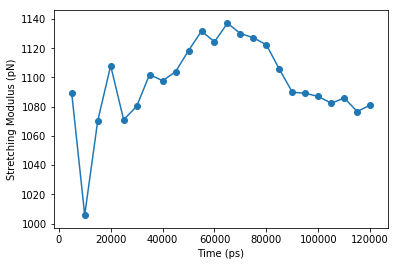

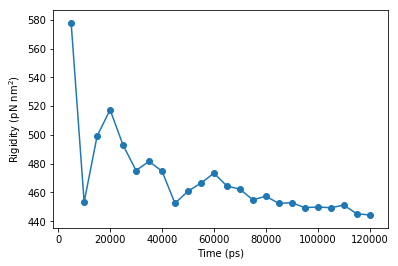

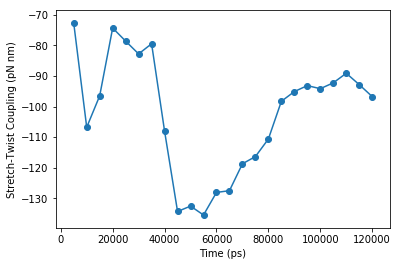

In [4]:
time, modulus = eyDNA.getModulusByTime([4,20], frameGap=500, masked=True)
print('Keys in returned dictionary:\n', '\n'.join(list(modulus.keys())), '\n-----------')

# Stretching modulus
plt.plot(time, modulus['stretch'])
plt.scatter(time, modulus['stretch'])
plt.xlabel('Time (ps)')
plt.ylabel(r'Stretching Modulus (pN)')
plt.show()

# Twist rigidity
plt.plot(time, modulus['twist'])
plt.scatter(time, modulus['twist'])
plt.xlabel('Time (ps)')
plt.ylabel(r'Rigidity (pN nm$^2$)')
plt.show()

# Stretch twist coupling
plt.plot(time, modulus['stretch-twist'])
plt.scatter(time, modulus['stretch-twist'])
plt.xlabel('Time (ps)')
plt.ylabel(r'Stretch-Twist Coupling (pN nm)',)
plt.show()

### Deformation free energy of bound DNA

Deformation energy of a probe DNA (bound DNA) can be calculated with reference to the DNA present in the current object.

The deformation free energy is calculated using elastic matrix as follows

$$G = \frac{1}{2L_0}\mathbf{xKx^T}$$

$$\mathbf{x} =  \begin{bmatrix}
                (\theta^{x} - \theta^{x}_0)    & (\theta^{y} - \theta^{y}_0) & (L - L_0) & (\phi - \phi_0)
                \end{bmatrix}$$


Where, $\mathbf{K}$, $\theta^{x}_0$, $\theta^{y}_0$, $L_0$ and $\phi_0$  is calculated from reference DNA while $\theta^{x}$, $\theta^{y}$, $L$ and $\phi$ is calculated for probe DNA from each frame.

We already loaded the data for reference DNA above. Here, we will load data for probe DNA.

In [5]:
# Load parameters of bound DNA
boundDNA = dnaMD.DNA(27, filename='elasticity_DNA/bound_dna.h5')

Deformation free energy can be calculated for the following motions that can be used with ``which`` option.

* ``'full'`` : Use entire elastic matrix -- all motions with their coupling
* ``'diag'`` : Use diagonal of elastic matrix -- all motions but no coupling
* ``'b1'`` : Only bending-1 motion
* ``'b2'`` : Only bending-2 motion
* ``'stretch'`` : Only stretching motion
* ``'twist'`` : Only Twisting motions
* ``'st_coupling'`` : Only stretch-twist coupling motion
* ``'bs_coupling'`` : Only Bending and stretching coupling
* ``'bt_coupling'`` : Only Bending and Twisting coupling
* ``'bb_coupling'`` : Only bending-1 and bending-2 coupling
* ``'bend'`` : Both bending motions with their coupling
* ``'st'`` : Stretching and twisting motions with their coupling
* ``'bs'`` : Bending (b1, b2) and stretching motions with their coupling
* ``'bt'`` : Bending (b1, b2) and twisting motions with their coupling

``which`` can be either ``'all'`` or a list of energy terms given above.


Keys in returned dictionary:
 full
diag
stretch
twist
st_coupling
b1
b2
bend
bs_coupling
bt_coupling
bb_coupling
st
bs
bt 
-----------


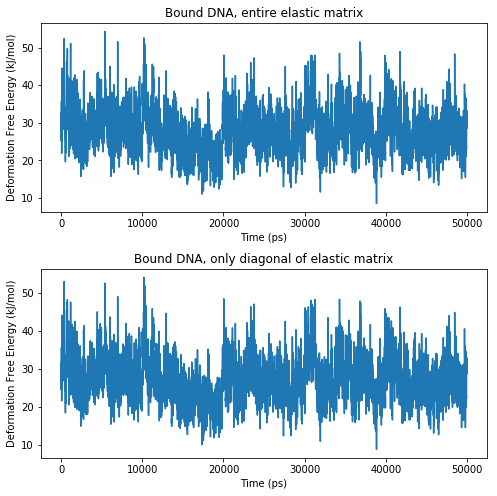

Energy(kJ/mol)         Average         Error
----------------------------------------------
full                    27.714         0.724
diag                    27.012         0.751
stretch                  2.468         0.157
twist                   15.061         0.478
st_coupling             -0.743         0.040
b1                       1.477         0.180
b2                       8.005         0.266
bend                     9.718         0.386
bs_coupling              0.034         0.002
bt_coupling              0.825         0.020
bb_coupling              0.235         0.020
st                      26.269         0.713
bs                      11.984         0.499
bt                      25.369         0.634



In [6]:
# Deformation free energy of bound DNA and calculate all above listed terms
time, energy = eyDNA.getGlobalDeformationEnergy([4,20], boundDNA, paxis='X', which='all', masked=True)
energyTerms=list(energy.keys())
print('Keys in returned dictionary:\n', '\n'.join(energyTerms), '\n-----------')

# Plot two energy terms
fig = plt.figure(figsize=(8,8))
fig.subplots_adjust(hspace=0.3)

ax1 = fig.add_subplot(211)
ax1.set_title('Bound DNA, entire elastic matrix')
ax1.plot(time, energy['full'])
ax1.set_xlabel('Time (ps)')
ax1.set_ylabel(r'Deformation Free Energy (kJ/mol)',)

ax2 = fig.add_subplot(212)
ax2.set_title('Bound DNA, only diagonal of elastic matrix')
ax2.plot(time, energy['diag'])
ax2.set_xlabel('Time (ps)')
ax2.set_ylabel(r'Deformation Free Energy (kJ/mol)',)

plt.show()


# Calculate average and error for each energy terms
error = dnaMD.get_error(time, list(energy.values()), len(energyTerms), err_type='block', tool='gmx analyze')

print("==============================================")
print('{0:<16}{1:>14}{2:>14}'.format('Energy(kJ/mol)', 'Average', 'Error'))
print("----------------------------------------------")
for i in range(len(energyTerms)):
    print('{0:<16}{1:>14.3f}{2:>14.3f}'.format(energyTerms[i], np.mean(energy[energyTerms[i]]),error[i]))
print("==============================================\n")

### Local elastic properties or stiffness

Local elastic properties can be caluclated using either local base-step parameters or local helical base-step parameters.

In case of **base-step** parameters: Shift ($Dx$), Slide ($Dy$), Rise ($Dz$), Tilt ($\tau$), Roll ($\rho$) and Twist ($\omega$), following elastic matrix is calculated.

$$
\mathbf{K}_{base-step} = \begin{bmatrix}
K_{Dx}        & K_{Dx,Dy}      & K_{Dx,Dz}      & K_{Dx,\tau}      & K_{Dx,\rho}      & K_{Dx,\omega} \\
K_{Dx,Dy}     & K_{Dy}         & K_{Dy,Dz}      & K_{Dy,\tau}      & K_{Dy,\rho}      & K_{Dy,\omega} \\
K_{Dx,Dz}     & K_{Dy,Dz}      & K_{Dz}         & K_{Dz,\tau}      & K_{Dz,\rho}      & K_{Dz,\omega} \\
K_{Dx,\tau}   & K_{Dy,\tau}    & K_{Dz,\tau}    & K_{\tau}         & K_{\tau, \rho}   & K_{\tau,\omega} \\
K_{Dx,\rho}   & K_{Dy,\rho}    & K_{Dz,\rho}    & K_{\tau, \rho}   & K_{\rho}         & K_{\rho,\omega} \\
K_{Dx,\omega} & K_{Dy,\omega}  & K_{Dz,\omega}  & K_{\tau, \omega} & K_{\rho, \omega} & K_{\omega} \\
\end{bmatrix}
$$

In case of **helical-base-step** parameters: x-displacement ($dx$), y-displacement ($dy$), h-rise ($h$), inclination ($\eta$), tip ($\theta$) and twist ($\Omega$), following elastic matrix is calculated.

$$
\mathbf{K}_{helical-base-step} = \begin{bmatrix}
K_{dx}        & K_{dx,dy}      & K_{dx,h}      & K_{dx,\eta}      & K_{dx,\theta}      & K_{dx,\Omega} \\
K_{dx,dy}     & K_{dy}         & K_{dy,h}      & K_{dy,\eta}      & K_{dy,\theta}      & K_{dy,\Omega} \\
K_{dx,h}      & K_{dy,h}       & K_{h}         & K_{h,\eta}       & K_{h,\theta}       & K_{h,\Omega} \\
K_{dx,\eta}   & K_{dy,\eta}    & K_{h,\eta}    & K_{\eta}         & K_{\eta, \theta}   & K_{\eta,\Omega} \\
K_{dx,\theta} & K_{dy,\theta}  & K_{h,\theta}  & K_{\eta, \theta} & K_{\theta}         & K_{\theta,\Omega} \\
K_{dx,\Omega} & K_{dy,\Omega}  & K_{h,\Omega}  & K_{\eta, \Omega} & K_{\theta, \Omega} & K_{\Omega} \\
\end{bmatrix}
$$


In [7]:
# base-step
avg, matrix = eyDNA.calculateLocalElasticity([10,13], helical=False)

# Print matrix in nice format
out = ''
mean_out = ''
for i in range(matrix.shape[0]):
    for j in range(matrix.shape[0]):
        if j != matrix.shape[0]-1:
            out += '{0:>10.5f}  '.format(matrix[i][j])
        else:
            out += '{0:>10.5f}\n'.format(matrix[i][j])
    mean_out += '{0:>15.3f}  '.format(avg[i])

print('Average values for all frames: ', mean_out)
print('=========== ============== Elastic Matrix =============== ===========\n')
print(out)
print('=========== ====================== ====================== ===========')

# helical base-step
avg, matrix = eyDNA.calculateLocalElasticity([10,13], helical=True)

# Print matrix in nice format
out = ''
mean_out = ''
for i in range(matrix.shape[0]):
    for j in range(matrix.shape[0]):
        if j != matrix.shape[0]-1:
            out += '{0:>10.5f}  '.format(matrix[i][j])
        else:
            out += '{0:>10.5f}\n'.format(matrix[i][j])
    mean_out += '{0:>15.3f}  '.format(avg[i])

print('\n\nAverage values for all frames: ', mean_out)
print('=========== ============== Elastic Matrix =============== ===========\n')
print(out)
print('=========== ====================== ====================== ===========')


Average values for all frames:            0.032           -0.490            1.365           -1.353           21.767          120.816  
=========== ============== Elastic Matrix =============== ===========

 182.38193    -0.43894   -33.29158    -1.10677    -0.10263     0.06223
  -0.43894   144.96085    47.83000     0.17088    -0.41365    -1.97614
 -33.29158    47.83000   536.89374     0.88922     0.19157    -0.04720
  -1.10677     0.17088     0.88922     0.03967     0.00187    -0.00237
  -0.10263    -0.41365     0.19157     0.00187     0.01341     0.01044
   0.06223    -1.97614    -0.04720    -0.00237     0.01044     0.05663

=========== ====================== ====================== ===========


Average values for all frames:           -1.345           -0.077            1.238           40.943            2.313          126.065  
=========== ============== Elastic Matrix =============== ===========

  36.97195    -1.71920   -17.32508     0.28692    -0.00210    -1.27421
  -1.71920    51.7

### Local deformation energy of a local small segment
Using the above elastic matrix, deformation energy of this base-step in bound DNA can be calucalted.

Keys in returned dictionary:
 full
diag
shift
slide
rise
tilt
roll
twist 
-----------


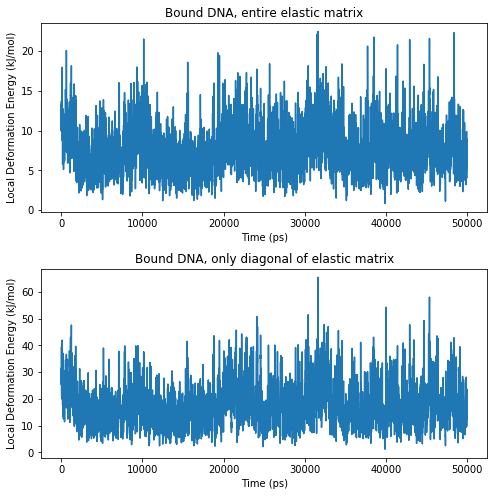

Energy(kJ/mol)         Average         Error
----------------------------------------------
full                     7.673         0.269
diag                    17.583         0.737
shift                    0.547         0.026
slide                    6.411         0.429
rise                     0.479         0.012
tilt                     0.683         0.016
roll                     2.552         0.146
twist                    6.911         0.313



In [8]:
# Here calculate energy for one base-step
time, energy = eyDNA.getLocalDeformationEnergy([10,13], boundDNA, helical=False, which='all')
energyTerms=list(energy.keys())
print('Keys in returned dictionary:\n', '\n'.join(energyTerms), '\n-----------')

# Plot two energy terms
fig = plt.figure(figsize=(8,8))
fig.subplots_adjust(hspace=0.3)

ax1 = fig.add_subplot(211)
ax1.set_title('Bound DNA, entire elastic matrix')
ax1.plot(time, energy['full'])
ax1.set_xlabel('Time (ps)')
ax1.set_ylabel(r'Local Deformation Energy (kJ/mol)',)

ax2 = fig.add_subplot(212)
ax2.set_title('Bound DNA, only diagonal of elastic matrix')
ax2.plot(time, energy['diag'])
ax2.set_xlabel('Time (ps)')
ax2.set_ylabel(r'Local Deformation Energy (kJ/mol)',)

plt.show()

# Calculate average and error for each energy terms
error = dnaMD.get_error(time, list(energy.values()), len(energyTerms), err_type='block', tool='gmx analyze')
print("==============================================")
print('{0:<16}{1:>14}{2:>14}'.format('Energy(kJ/mol)', 'Average', 'Error'))
print("----------------------------------------------")
for i in range(len(energyTerms)):
    print('{0:<16}{1:>14.3f}{2:>14.3f}'.format(energyTerms[i], np.mean(energy[energyTerms[i]]),error[i]))
print("==============================================\n")


### Deformation energy of the consecutive overlapped DNA segments

Above method gives energy of a small local segment of the DNA. However, we mostly interested in large segment of the DNA. This large segment can be further divided into smaller local segments. For these smaller segments local deformation energy can be calculated. Here these segments overlapped with each other.

Keys in returned dictionary:
 full
diag
shift
slide
rise
tilt
roll
twist 
-----------


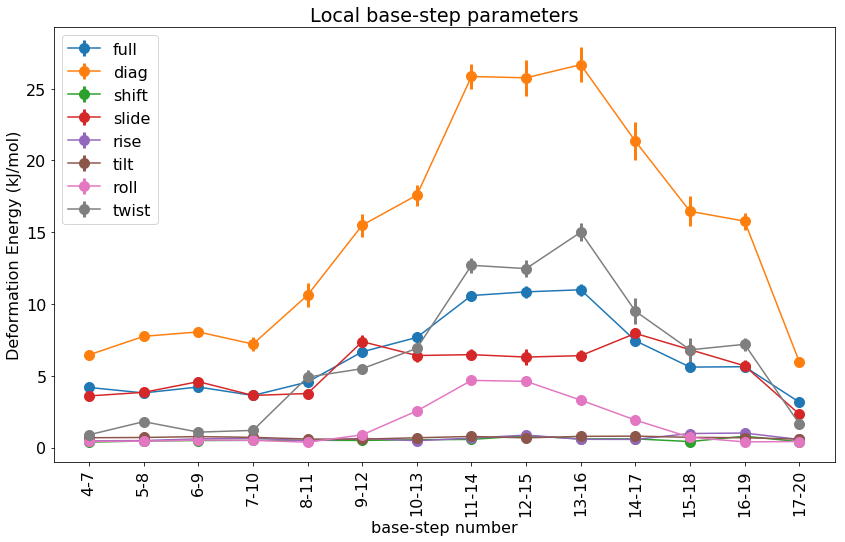

In [9]:
# First calculation for local base-step parameters
segments, energies, error = eyDNA.getLocalDeformationEnergySegments([4,20], boundDNA, span=4, 
                                                                    helical=False, which='all',
                                                                    err_type='block',
                                                                    tool='gmx analyze')
energyTerms=list(energies.keys())
print('Keys in returned dictionary:\n', '\n'.join(energyTerms), '\n-----------')

# Now plot the data
fig = plt.figure(figsize=(14,8))
fig.subplots_adjust(hspace=0.3)
mpl.rcParams.update({'font.size': 16})

xticks = range(len(segments))

ax1 = fig.add_subplot(111)
ax1.set_title('Local base-step parameters')

for term in energyTerms:
    ax1.errorbar(xticks, energies[term], yerr=error[term], ms=10, elinewidth=3, fmt='-o', label=term)
ax1.set_xticks(xticks)
ax1.set_xticklabels(segments, rotation='vertical')
ax1.set_xlabel('base-step number')
ax1.set_ylabel(r'Deformation Energy (kJ/mol)',)
plt.legend()

plt.show()

***


Same as the above but energy is calculated using helical base-step parameters

Keys in returned dictionary:
 full
diag
x-disp
y-disp
h-rise
inclination
tip
h-twist 
-----------


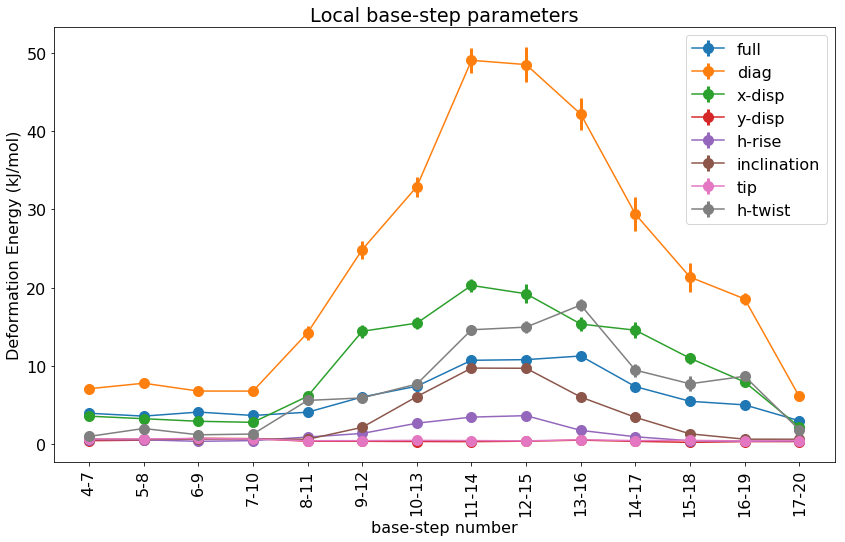

In [10]:
# Secind calculation for local base-step parameters
segments, energies, error = eyDNA.getLocalDeformationEnergySegments([4,20], boundDNA, span=4, 
                                                                    helical=True, which='all',
                                                                    err_type='block',
                                                                    tool='gmx analyze')
energyTerms=list(energies.keys())
print('Keys in returned dictionary:\n', '\n'.join(energyTerms), '\n-----------')

# Now plot the data
fig = plt.figure(figsize=(14,8))
fig.subplots_adjust(hspace=0.3)
mpl.rcParams.update({'font.size': 16})

xticks = range(len(segments))

ax1 = fig.add_subplot(111)
ax1.set_title('Local base-step parameters')

for term in energyTerms:
    ax1.errorbar(xticks, energies[term], yerr=error[term], ms=10, elinewidth=3, fmt='-o', label=term)
ax1.set_xticks(xticks)
ax1.set_xticklabels(segments, rotation='vertical')
ax1.set_xlabel('base-step number')
ax1.set_ylabel(r'Deformation Energy (kJ/mol)',)
plt.legend()

plt.show()